In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
netflix_df = pd.read_csv('Case Studies/netflix/NetFlix.csv')

In [3]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,genres,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,14-Aug-20,2020,TV-MA,4,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s10,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,15-Dec-17,2008,TV-MA,143,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...
2,s100,Movie,3 Heroines,Iman Brotoseno,"Reza Rahadian, Bunga Citra Lestari, Tara Basro...",Indonesia,5-Jan-19,2016,TV-PG,124,"Dramas, International Movies, Sports Movies",Three Indonesian women break records by becomi...
3,s1000,Movie,Blue Mountain State: The Rise of Thadland,Lev L. Spiro,"Alan Ritchson, Darin Brooks, James Cade, Rob R...",United States,1-Mar-16,2016,R,90,Comedies,New NFL star Thad buys his old teammates' belo...
4,s1001,TV Show,Blue Planet II,NaN,David Attenborough,United Kingdom,3-Dec-18,2017,TV-G,1,"British TV Shows, Docuseries, Science & Nature TV",This sequel to the award-winning nature series...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s995,TV Show,Blown Away,NaN,NaN,Canada,12-Jul-19,2019,TV-14,1,"International TV Shows, Reality TV",Ten master artists turn up the heat in glassbl...
7783,s996,TV Show,Blue Exorcist,NaN,"Nobuhiko Okamoto, Jun Fukuyama, Kana Hanazawa,...",Japan,1-Sep-20,2017,TV-MA,2,"Anime Series, International TV Shows",Determined to throw off the curse of being Sat...
7784,s997,Movie,Blue Is the Warmest Color,Abdellatif Kechiche,"Léa Seydoux, Adèle Exarchopoulos, Salim Kechio...","France, Belgium, Spain",26-Aug-16,2013,NC-17,180,"Dramas, Independent Movies, International Movies","Determined to fall in love, 15-year-old Adele ..."
7785,s998,Movie,Blue Jasmine,Woody Allen,"Cate Blanchett, Sally Hawkins, Alec Baldwin, L...",United States,8-Mar-19,2013,PG-13,98,"Comedies, Dramas, Independent Movies",The high life leads to high anxiety for a fash...


In [4]:
netflix_df.shape  # No of Rows and Columns 

(7787, 12)

In [5]:
netflix_df.size  #No of Elements

93444

In [6]:
netflix_df.columns # Getting overview of Columns present in the dataset

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'genres', 'description'],
      dtype='object')

In [7]:
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration         int64
genres          object
description     object
dtype: object

In [8]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   int64 
 10  genres        7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(2), object(10)
memory usage: 730.2+ KB


In [9]:
# Checking for Duplicate in  Dataset

In [10]:
netflix_df.duplicated().sum()

0

In [11]:
netflix_df.isnull().sum()   #Total Null Values

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
genres             0
description        0
dtype: int64

In [12]:
# Replacing director and cast column containig NA with Uknown and nan values with mode 

In [13]:
netflix_df['director'].fillna('Uknown',inplace  = True)
netflix_df['cast'].fillna('Uknown',inplace  = True)
netflix_df['country'].fillna(netflix_df['country'].mode()[0], inplace =True)

In [14]:
netflix_df.dropna(subset = ['date_added'],inplace = True) # Droping Date as represent small fraction of dataset

In [15]:
netflix_df['rating'].fillna(netflix_df['rating'].mode()[0],inplace = True) # Replacing rating nan with mode 

In [16]:
print(netflix_df.isna().sum()) # checking if there is na present in the dataset

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
genres          0
description     0
dtype: int64


#### Data Cleaning is completed so now moving on to Feature Extraction

In [17]:
netflix_df['date_added'] = pd.to_datetime(netflix_df['date_added'], format ='%d-%b-%y', errors = 'coerce') # Converting date_added into proper date format

In [18]:
# Extractig year , month , day from date added for futher analysis

In [19]:
netflix_df['added_year']  = netflix_df['date_added'].dt.year
netflix_df['added_month'] = netflix_df['date_added'].dt.month_name()
netflix_df['added_day']   = netflix_df['date_added'].dt.day_name()    

In [20]:
netflix_df.dtypes # Checking the data type of columns to ensure correct format

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                 int64
genres                  object
description             object
added_year             float64
added_month             object
added_day               object
dtype: object

In [21]:
current_year = datetime.now().year
netflix_df['content_age'] = current_year - netflix_df['release_year']  #Creating content age

#### Replacing old rattings with current ratings

In [22]:
ratings_mapping = {
    "TV-MA"    : "Mature Audiences",
    "TV-14"    : "Teens 14+",
    "TV-PG"    : "Parental Guidance",
     "R"       : "Restricted",
    "PG-13"    : "Teens 13+",
    "TV-Y"     : "All Children",
    "TV-Y7"    : "Older Children",
    "PG"       : "Parental Guidance",
    "TV-G"     : "General Audiences",
    "NR"       : "Not Rated",
    "G"        : "General Audiences",
   "TV-Y7-FV"  : "Older Children - Fantasy Violence",
    "UR"       : "Unrated",
    "NC-17"    : "Adults Only"
}

In [23]:
netflix_df['rating'] = netflix_df['rating'].map(ratings_mapping)

In [24]:
netflix_df['director'].replace('Uknown', 'unknown', inplace=True) #Replacing director
netflix_df['cast'].replace('Uknown','unknown', inplace = True) # Replacing Cast

In [25]:
netflix_df['country'].value_counts()

country
United States                             3055
India                                      923
United Kingdom                             396
Japan                                      225
South Korea                                183
                                          ... 
Argentina, United States, Mexico             1
Canada, Germany, France, United States       1
Soviet Union, India                          1
Taiwan, China, France, United States         1
France, Belgium, Spain                       1
Name: count, Length: 681, dtype: int64

#### Since there are more countries producing 1 movie so we will split to get how many countries are there 

In [26]:
country_split = netflix_df[['show_id' , 'type' , 'country']].copy()
country_split.dropna(inplace = True)
country_split['country'] = country_split['country'].apply(lambda x : x.split(','))
country_split = country_split.explode('country')
country_split

,show_id,type,country
0,s1,TV Show,Brazil
1,s10,Movie,India
2,s100,Movie,Indonesia
3,s1000,Movie,United States
4,s1001,TV Show,United Kingdom
...,...,...,...
7784,s997,Movie,France
7784,s997,Movie,Belgium
7784,s997,Movie,Spain
7785,s998,Movie,United States


In [27]:
country_split['country'] = country_split['country'].str.strip()

In [28]:
country_split.loc[country_split['country'] == '']
country_split = country_split.loc[country_split['country'] != '']
country_split['country'].nunique()

117

In [29]:
x = country_split.groupby(['country' , 'type'])['show_id'].count().reset_index()
x.pivot(index = ['country'] , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)

type,Movie,TV Show
country,,
United States,2661.0,1136.0
India,915.0,75.0
United Kingdom,467.0,255.0
Canada,286.0,126.0
France,265.0,84.0
...,...,...
Cuba,NaN,1.0
Cyprus,NaN,1.0
Mauritius,NaN,1.0


In [30]:
netflix_df['genres'].value_counts()

genres
Documentaries                                                      334
Stand-Up Comedy                                                    321
Dramas, International Movies                                       320
Comedies, Dramas, International Movies                             243
Dramas, Independent Movies, International Movies                   215
                                                                  ... 
Anime Features, Music & Musicals                                     1
Comedies, Cult Movies, Sports Movies                                 1
Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy           1
TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows                        1
Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy      1
Name: count, Length: 491, dtype: int64

#### Since a movie or TV show can have more than one genre so we need to split to get how many genres are there 

In [31]:
split_genres = netflix_df[['show_id', 'type', 'genres', 'duration']].copy()
split_genres['genres'] = split_genres['genres'].apply(lambda x: x.split(','))
split_genres = split_genres.explode('genres')
split_genres['genres'] = split_genres['genres'].str.strip()

In [32]:
split_genres

,show_id,type,genres,duration
0,s1,TV Show,International TV Shows,4
0,s1,TV Show,TV Dramas,4
0,s1,TV Show,TV Sci-Fi & Fantasy,4
1,s10,Movie,Horror Movies,143
1,s10,Movie,International Movies,143
...,...,...,...,...
7785,s998,Movie,Dramas,98
7785,s998,Movie,Independent Movies,98
7786,s999,Movie,Dramas,81
7786,s999,Movie,Independent Movies,81


<!-- EDA Analysis -->

#### Feature Extraction Completed so now moving on to Exploratory Data Analysis part

# Exploratory Data Analysis

### How many unique shows and movies are there?

In [33]:
unique_titles = netflix_df['title'].nunique()
unique_types = netflix_df['type'].value_counts()

print(f"Unique Titles: {unique_titles}")
print("Content Type Distribution:\n", unique_types)

Unique Titles: 7777
Content Type Distribution:
 type
Movie      5377
TV Show    2400
Name: count, dtype: int64


### Top 10 Countries

In [34]:
netflix_df['country'].value_counts().head(10)

country
United States     3055
India              923
United Kingdom     396
Japan              225
South Korea        183
Canada             177
Spain              134
France             115
Egypt              101
Mexico             100
Name: count, dtype: int64

# What is the distribution of content types (Movies vs. TV Shows)?

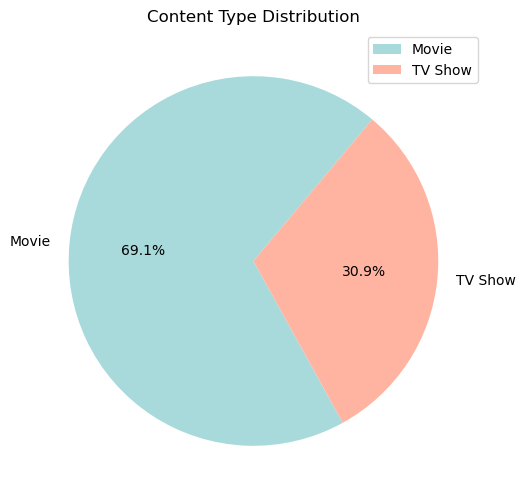

In [35]:
content_types = netflix_df['type'].value_counts()
plt.figure(figsize=(10,6))
plt.title("Content Type Distribution")
plt.pie(content_types, labels = content_types.index, autopct='%1.1f%%', colors=['#a8dadc','#ffb4a2'], startangle=50)
plt.legend()
plt.show()

#### Inference : Movies are more readily available on Netflix compared to TV Shows.

#### Recommendation : Netflix should consider adding more TV Shows to enhance entertainment options and cater to target customers who prefer episodic content.

#### Checking for Mininmum year present in data

In [36]:
int(min(netflix_df['added_year']))

2008

#### Checking for the Maximum year in data 

In [37]:
int(max(netflix_df['added_year']))

2021

# Titles Added Per Year 

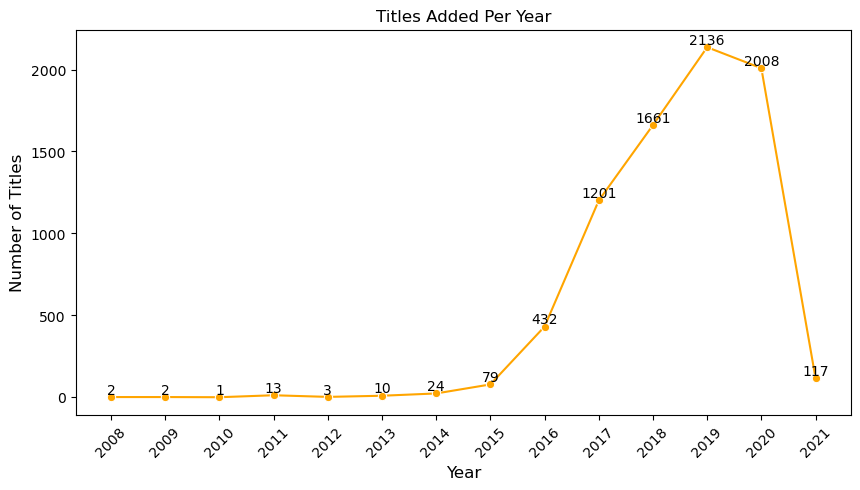

In [38]:
netflix_df = netflix_df.copy()
netflix_df.loc[:, 'added_year'] = pd.to_numeric(netflix_df['added_year'], errors='coerce')
titles_per_year = netflix_df.groupby('added_year').size().reset_index(name='count')
titles_per_year = titles_per_year.sort_values(by='added_year')
plt.figure(figsize=(10, 5))
sns.lineplot(data=titles_per_year, x='added_year', y='count', marker='o', color='orange')
for i in range(len(titles_per_year)):
    plt.text(
        titles_per_year['added_year'].iloc[i], 
        titles_per_year['count'].iloc[i], 
        str(titles_per_year['count'].iloc[i]), 
        ha='center', 
        va='bottom'
    )
plt.title("Titles Added Per Year")
plt.xlabel("Year", fontsize = 12)
plt.ylabel("Number of Titles" , fontsize = 12)
plt.xticks(sorted(titles_per_year['added_year'].dropna().astype(int)), rotation=45)
plt.show()

#### Inference : The number of titles added has steadily increased over the years, with 2019 having the highest number of additions.

# Titles added per month

#### Since we have only one month data for our latest year 2021 that is jan so we will see month wise from 2017 to 2020

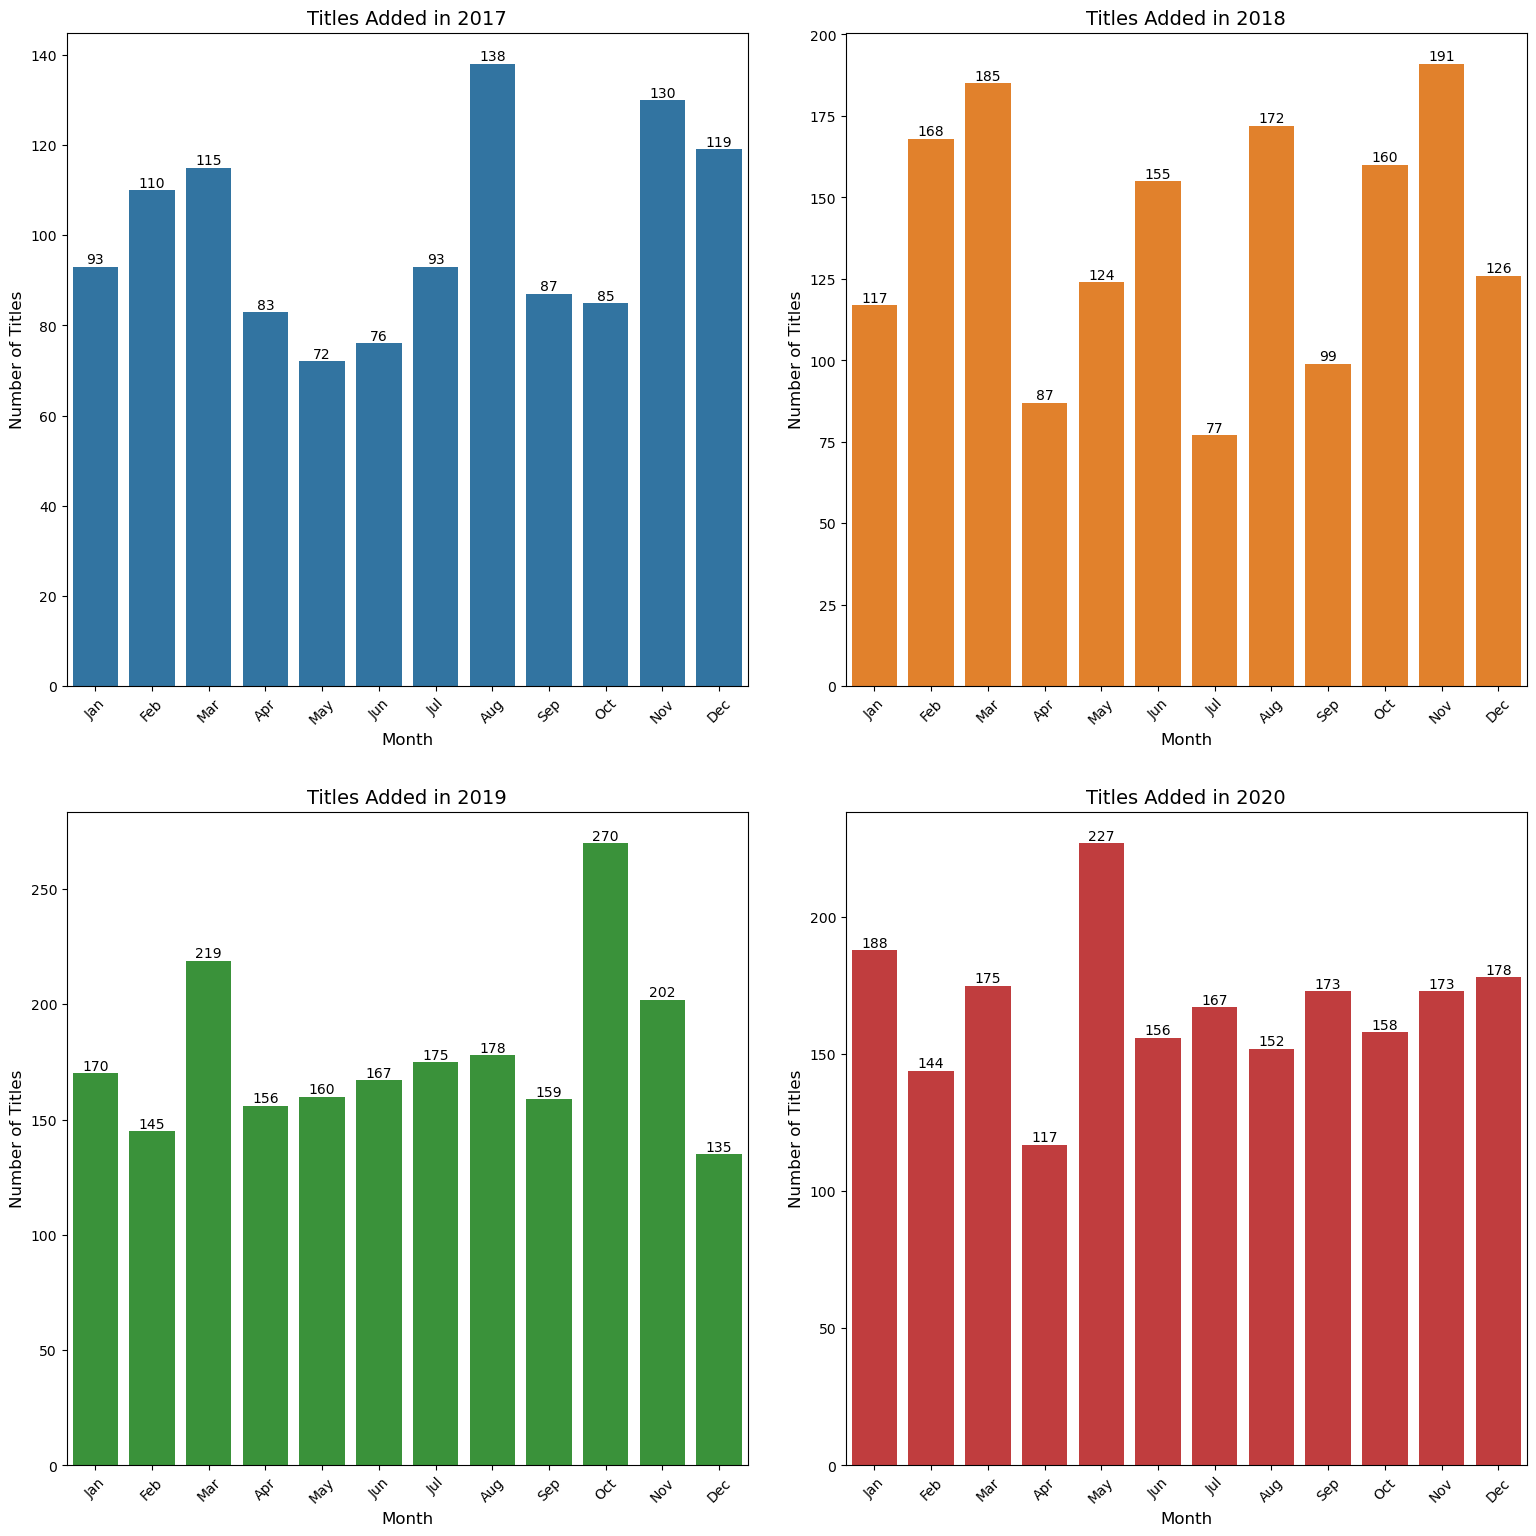

In [39]:
netflix_df = netflix_df[netflix_df['added_year'].notna()]

filtered_data = netflix_df[netflix_df['added_year'].between(2017, 2020)]

# Create subplots for each of the 4 years
fig, axes = plt.subplots(2, 2, figsize=(16, 16))
axes = axes.flatten()  # Flatten to easily index the axes

custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728']  # Hex color codes

unique_years = sorted(filtered_data['added_year'].unique())

for i, year in enumerate(unique_years):
    titles_per_month = filtered_data[filtered_data['added_year'] == year].groupby(['added_month', 'added_year']).size().reset_index(name='count')
    
    sns.barplot(x='added_month', y='count', data=titles_per_month, ax=axes[i], palette=[custom_colors[i]], hue='added_year')
    
    for j in range(len(titles_per_month)):
        axes[i].text(j, titles_per_month['count'].iloc[j], str(titles_per_month['count'].iloc[j]), ha='center', va='bottom')

    # Customizing the subplot
    axes[i].set_title(f'Titles Added in {int(year)}', fontsize=14)
    axes[i].set_xlabel('Month', fontsize=12)
    axes[i].set_ylabel('Number of Titles', fontsize=12)
    axes[i].set_xticks(range(12))
    axes[i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)

# Remove the legend from the plot
for ax in axes:
    ax.legend([],[], frameon=False)
# Adjust layout for better spacing and avoid label overlap
plt.tight_layout(pad=3.0)  # Add padding between subplots
plt.show()

### Inference :
- **2017**: August saw the highest number of titles added (138), while May had the lowest (72).
- **2018**: November had the maximum titles added (191), and July had the lowest (77).
- **2019**: October recorded the most additions (270), whereas December had the least (135).
- **2020**: May saw the maximum titles added (227), while April had the lowest (117).


# Top 10 Genre

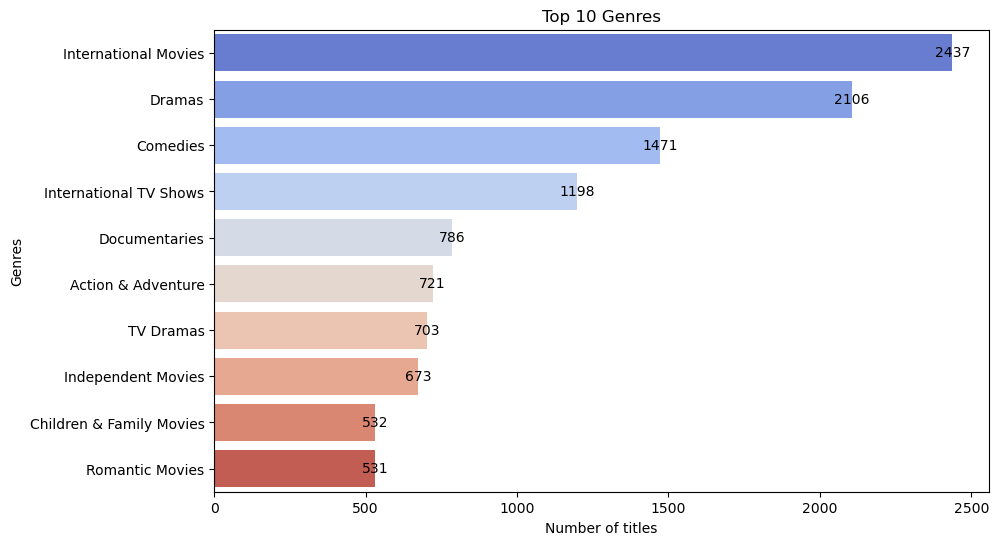

In [40]:
top_10_genres = split_genres['genres'].value_counts().head(10)
plt.figure(figsize = (10,6))
ax = sns.barplot(x = top_10_genres.values, y = top_10_genres.index, hue = top_10_genres.index, palette='coolwarm')
# Adding labels on the bars
for i in range(len(top_10_genres)):
    ax.text(top_10_genres.values[i] + 0.2, i, str(top_10_genres.values[i]), 
            color='black', ha='center', va='center')
plt.title("Top 10 Genres")
plt.xlabel('Number of titles')
plt.ylabel('Genres')
plt.show()

#### Inference : The most available genre on Netflix is International, followed by Dramas, while Romantic Movies is the least available genre.

# Top 10 Countries Producing Netflix Content between 2010 and 2020

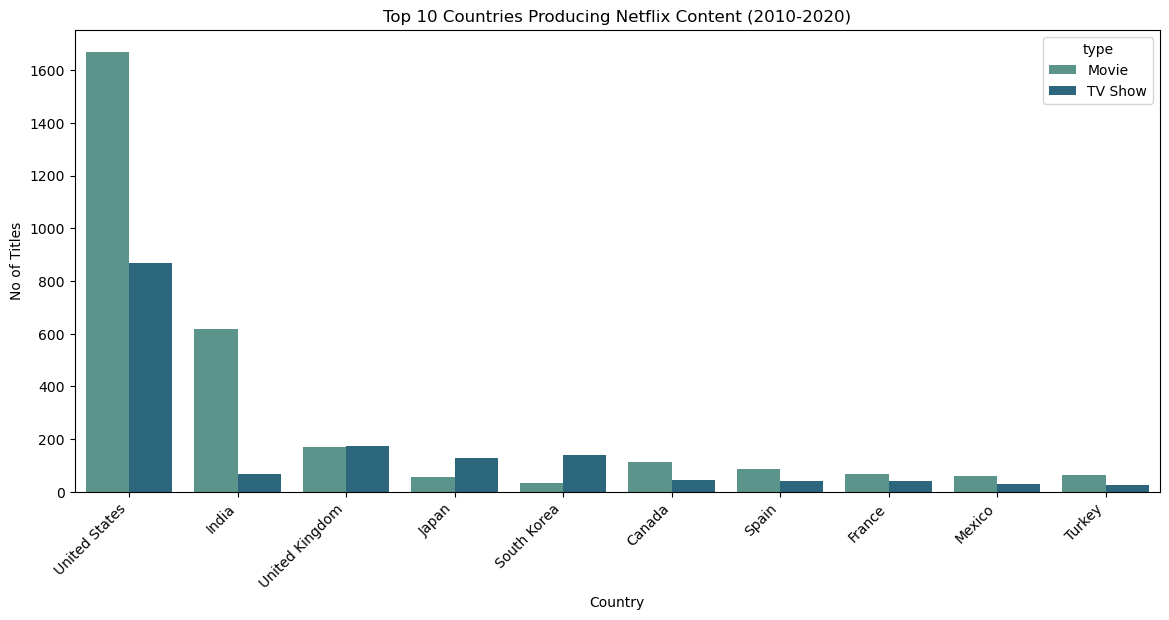

In [41]:
netflix_filtered = netflix_df[netflix_df['release_year'].between(2010, 2020)]
top_countries = netflix_filtered['country'].value_counts().head(10)
type_order = ['Movie', 'TV Show'] 
plt.figure(figsize=(14, 6))
sns.countplot(
    data=netflix_filtered,
    x='country',
    hue='type',
    hue_order=type_order,
    order=top_countries.index,
    palette='crest'
)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Countries Producing Netflix Content (2010-2020)')
plt.xlabel('Country')
plt.ylabel('No of Titles')
plt.show()

## Inference :
- The United States produces more movies and TV Shows compared to India.
- Japan and South Korea predominantly produce more TV Shows than movies.
- In other countries, movies outnumber TV Shows.

# Distribution of Ratings 

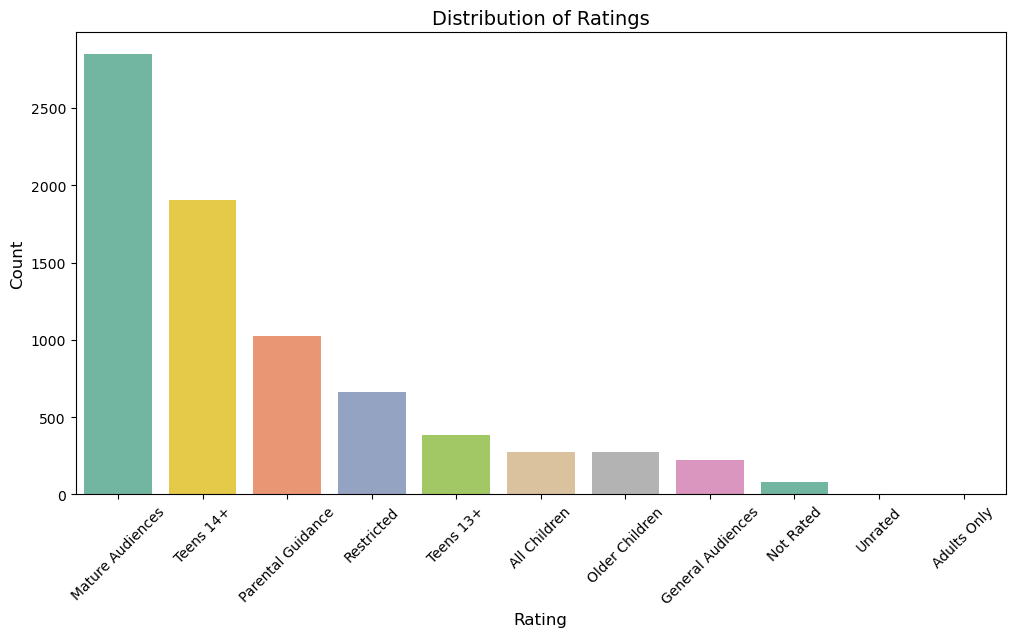

In [42]:
netflix_df.loc[:, 'rating'] = netflix_df['rating'].str.strip()
netflix_df.loc[:, 'rating'] = netflix_df['rating'].replace({
    'Older Children - Fantasy Violence': 'Older Children',
    'Unrated': 'Unrated'
})
rating_order = [
    'Mature Audiences', 'Teens 14+', 'Parental Guidance', 'Restricted',
    'Teens 13+', 'All Children', 'Older Children', 'General Audiences',
    'Not Rated', 'Unrated', 'Adults Only'
]

plt.figure(figsize=(12, 6))
ax = sns.countplot(data=netflix_df, x='rating',  hue = 'rating' ,order=rating_order, palette='Set2')
plt.title('Distribution of Ratings', fontsize=14)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.show()

#### Inference - The highest number of titles on Netflix cater to Mature Audiences, while content for General Audiences and Older Children is comparatively limited.

# Ratings Distribution by Type

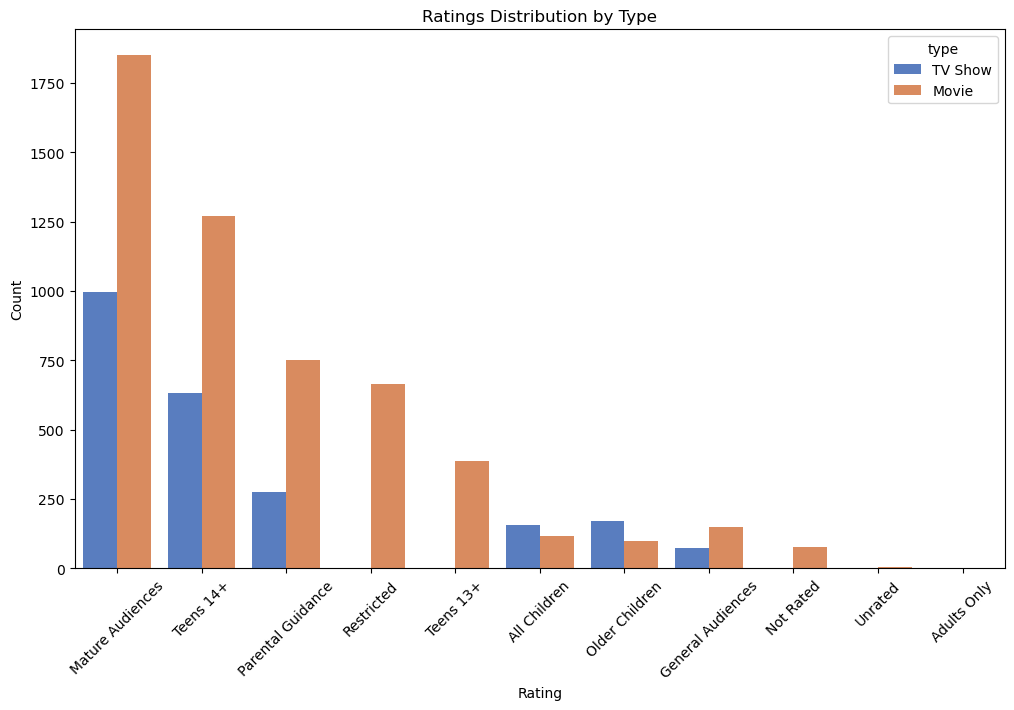

In [43]:
plt.figure(figsize=(12, 7))
sns.countplot(data=netflix_df, x='rating', hue='type', palette='muted', order=netflix_df['rating'].value_counts().index)
plt.title("Ratings Distribution by Type")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45 , fontsize = 10)
plt.show()

#### Inference : 
- There are more Mature Audience Movies than TV Shows.
- No TV Shows exist under the Restricted Rating category.
- Older Children TV Shows outnumber older movies.

# Average Content Age Across Release Years

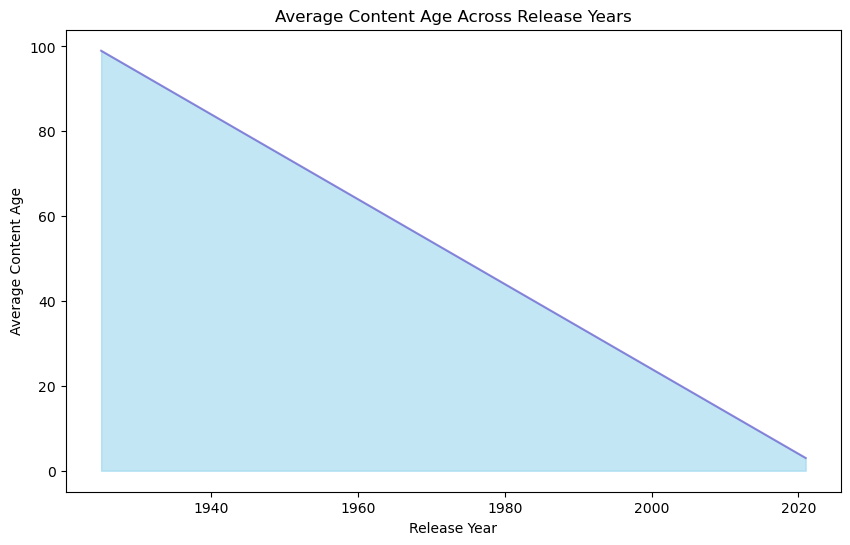

In [44]:
content_years = netflix_df.groupby('release_year')['content_age'].mean().reset_index()
plt.figure(figsize=(10, 6))
plt.fill_between(content_years['release_year'], content_years['content_age'], color='skyblue', alpha=0.5)
plt.plot(content_years['release_year'], content_years['content_age'], color='Slateblue', alpha=0.7)
plt.title('Average Content Age Across Release Years')
plt.xlabel('Release Year')
plt.ylabel('Average Content Age')
plt.show()

#### Inference :
- The chart shows a declining trend in the average content age over the years.
- Netflix is shifting from older content (e.g., early 1900s) to newer releases.
- This trend reflects Netflix's strategy to align with viewer preferences for modern titles, gradually phasing out older content.


# Trend of each type of content Released over the years

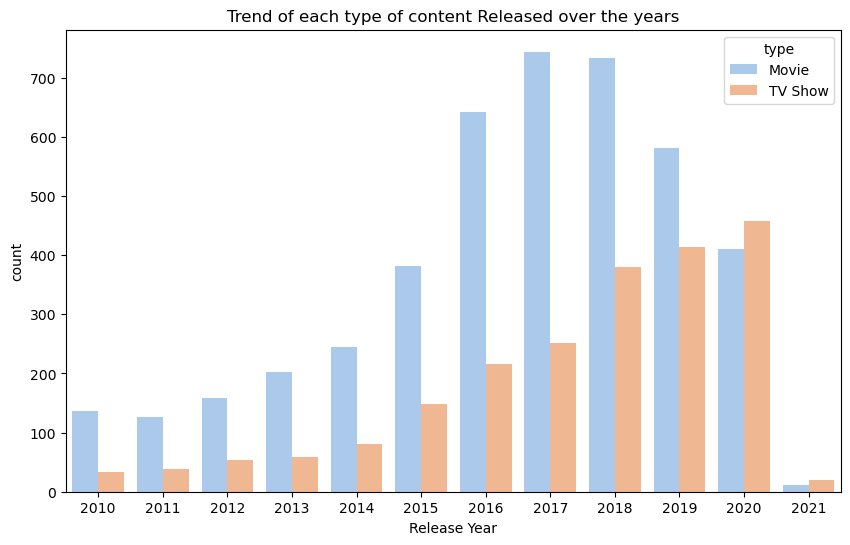

In [45]:
last_decade = netflix_df[["type", "release_year"]]
last_decade = last_decade.rename(columns = {"release_year" : "Release Year"})
last_decade = last_decade[last_decade["Release Year"]>=2010]
last_decade
last_decade_df = last_decade.groupby("Release Year")["type"].size().reset_index()
last_decade.groupby("Release Year")["type"].value_counts()
plt.figure(figsize = (10,6))
count_plot = sns.countplot(x = "Release Year", data = last_decade, hue="type",
             palette= "pastel")
count_plot.set(title = "Trend of each type of content Released over the years")
plt.show()

#### Inference - 2016, 2017, and 2018, these years witnessed the highest number of movies released compared to TV Shows.

# Top 10 Directors 

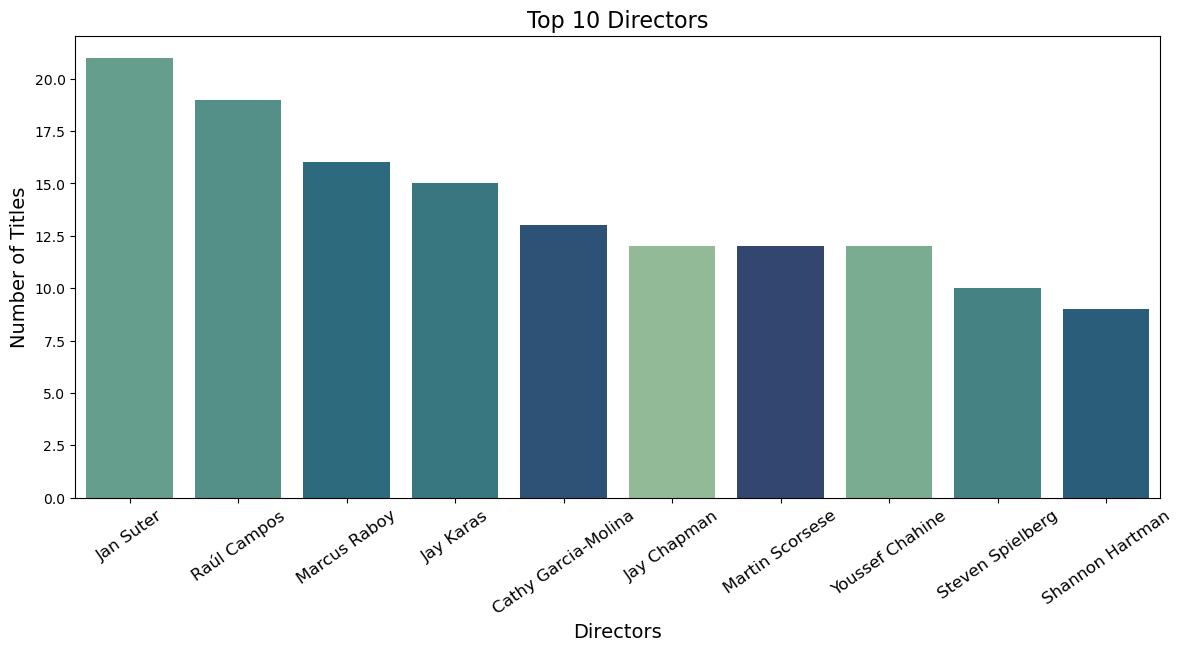

In [46]:
dir_td = netflix_df[['show_id' , 'type' , 'director']].copy()
dir_td.dropna(inplace = True)
dir_td['director'] = dir_td['director'].apply(lambda x : x.split(','))
dir_td
dir_td = dir_td.explode('director')
dir_td['director'] = dir_td['director'].str.strip()
known_directors = dir_td[dir_td['director'].str.lower() != 'unknown']

# Get the count of each director and identify the top 10
director_counts = known_directors['director'].value_counts()
top_directors = director_counts.head(10).index

top_directors_data = known_directors[known_directors['director'].isin(top_directors)]
plt.figure(figsize=(14, 6))
sns.countplot(
    data=top_directors_data,
    x='director',
    hue = 'director',
    order=top_directors,
    palette='crest'
)
plt.title("Top 10 Directors", fontsize=16)
plt.xlabel("Directors", fontsize=14)
plt.ylabel("Number of Titles", fontsize=14)
plt.xticks(rotation=35, fontsize=12)
plt.show()

#### Inference - Jan Suter produced the highest number of titles, while Jay Chapman, Martin Scorsese, and Youssef Chahine each produced an equal number of titles.

# Top 10 Actors 

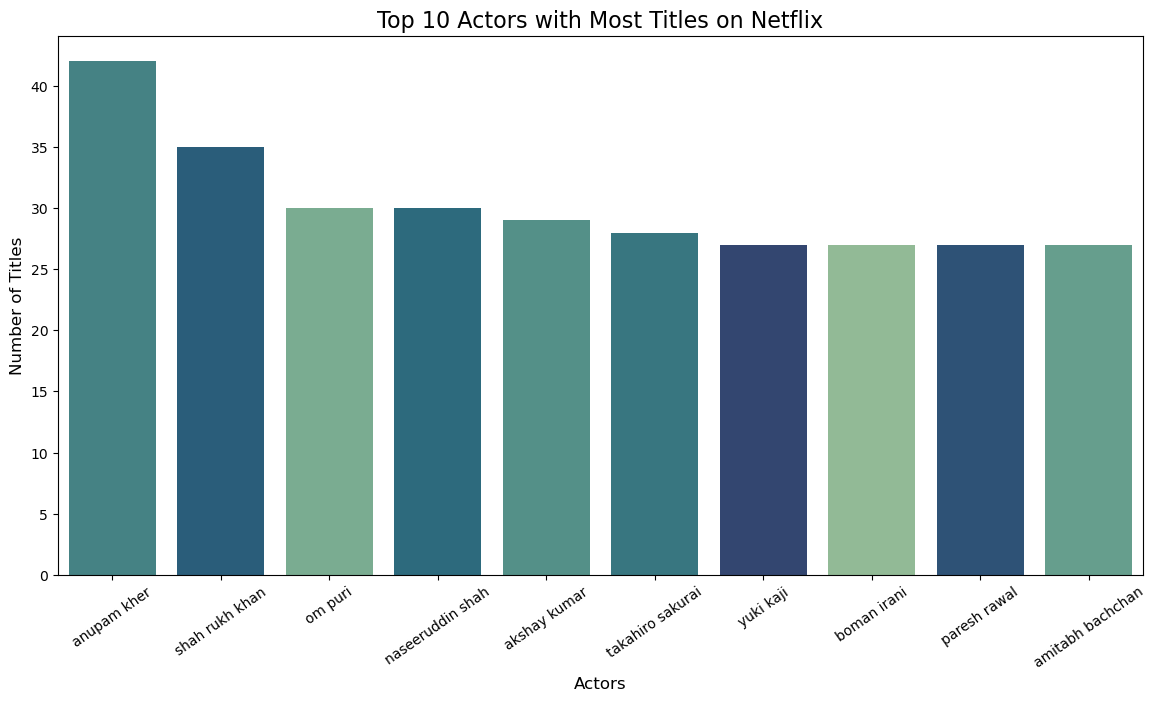

In [47]:
# Explode the 'cast' column to separate rows for each actor
cast_td = netflix_df[['show_id', 'type', 'cast']].copy()

# Drop rows where 'cast' is missing
cast_td.dropna(inplace=True)

# Clean and explode the 'cast' column
cast_td['cast'] = cast_td['cast'].str.lower().str.strip()
cast_td['cast'] = cast_td['cast'].apply(lambda x: x.split(','))
cast_td = cast_td.explode('cast')
cast_td['cast'] = cast_td['cast'].str.strip()

# Filter out rows with 'unknown' in the cast column
known_cast = cast_td[cast_td['cast'] != 'unknown']
actor_counts = known_cast['cast'].value_counts()
top_actors = actor_counts.head(10).index
top_actors_data = known_cast[known_cast['cast'].isin(top_actors)]

plt.figure(figsize=(14, 7))
sns.countplot(
    data=top_actors_data,
    x='cast',
    hue = 'cast',
    order=top_actors,
    palette='crest'
)
plt.title("Top 10 Actors with Most Titles on Netflix", fontsize=16)
plt.xlabel("Actors", fontsize=12)
plt.ylabel("Number of Titles", fontsize=12)
plt.xticks(rotation=35, fontsize=10)
plt.show()

#### Inference - Anupam Kher acted in the highest number of movies among Indian actors.

#### Note :- Due to missing data, most actors shown in this analysis are from India, even though the United States has produced the highest number of movies and TV shows overall.

# Most Frequent Words in Titles

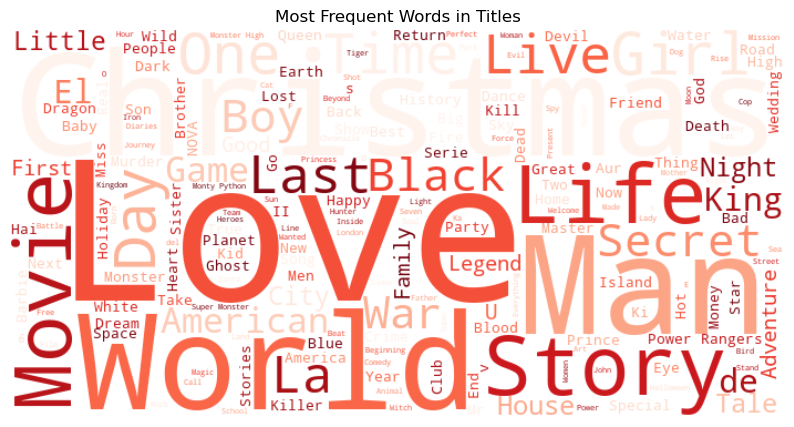

In [48]:
from wordcloud import WordCloud
text = " ".join(netflix_df['title'].dropna())
wordcloud = WordCloud(width = 700 , height = 350 , background_color='white', colormap='Reds').generate(text)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Titles")
plt.show()

#### Inference - From the WordCloud of genres, words like Love, Christmas, Man, Day, and Time appear as the most frequent.

# Most Frequent Words in Genres

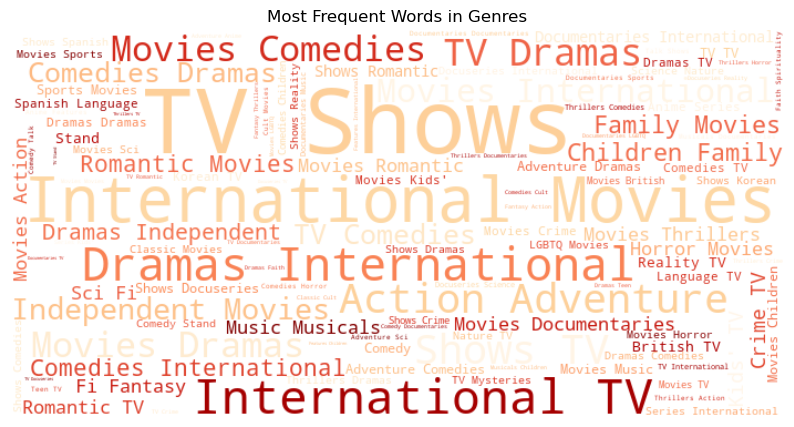

In [49]:
text1 = " ".join(split_genres['genres'].dropna())
wordcloud1 = WordCloud(width = 700 , height = 350 , background_color='white', colormap='OrRd').generate(text1)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud1,interpolation='bilinear')
plt.axis('off')
plt.title("Most Frequent Words in Genres")
plt.show()

#### Inference - Common words such as International Movies, TV Shows, Dramas, and Action Adventures dominate the genre-related terms, which aligns with the genre distribution observed in previous charts.

# Average Duration by Genre

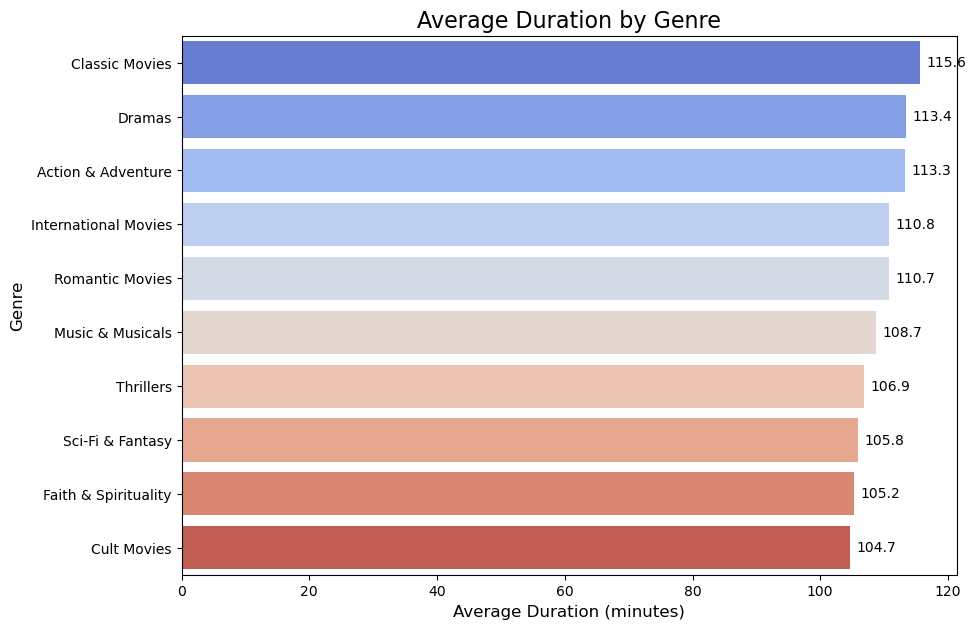

In [50]:
avg_duration_by_genre = split_genres.groupby('genres')['duration'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 7))
sns.barplot(x=avg_duration_by_genre.values, y=avg_duration_by_genre.index, hue = avg_duration_by_genre.index, palette='coolwarm')
for index, value in enumerate(avg_duration_by_genre.values):
    plt.text(value + 1, index, f'{value:.1f}', va='center', fontsize=10)
plt.title("Average Duration by Genre", fontsize=16)
plt.xlabel("Average Duration (minutes)", fontsize=12)
plt.ylabel("Genre", fontsize=12)
plt.show()

#### Inference - Most genres tend to have an average duration of approximately 110 minutes, while classics typically have a slightly longer duration of around 115 minutes.

# Popular Topics Over Time

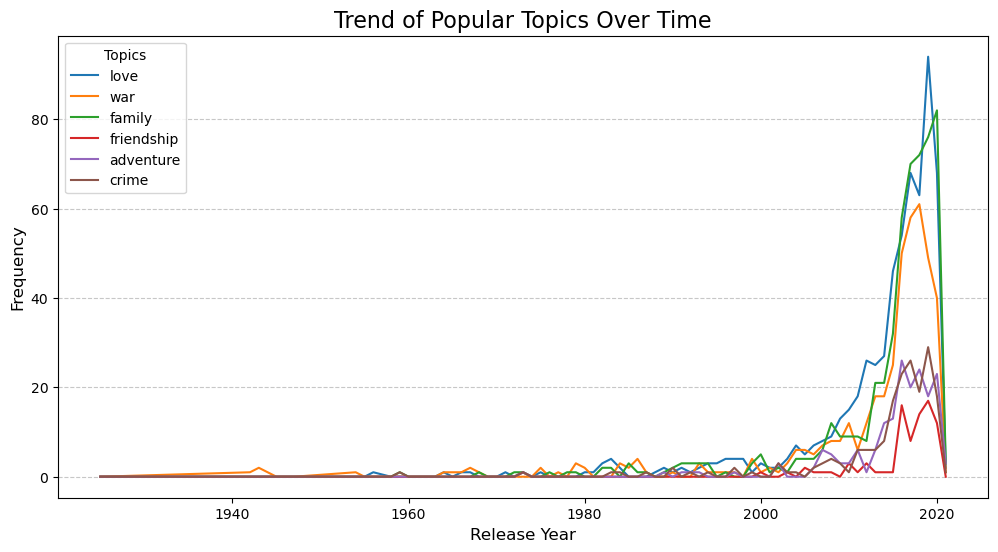

In [51]:
# Define popular topics
popular_topics = ['love', 'war', 'family', 'friendship', 'adventure', 'crime']
for topic in popular_topics:
    netflix_df[topic] = netflix_df['description'].str.contains(topic, case=False, na=False).astype(int)
topic_trends = netflix_df.groupby('release_year')[popular_topics].sum()

# Melting the DataFrame for Seaborn plotting
topic_trends_melted = topic_trends.reset_index().melt(id_vars='release_year', var_name='Topic', value_name='Frequency')
plt.figure(figsize=(12, 6))
sns.lineplot(data=topic_trends_melted, x='release_year', y='Frequency', hue='Topic', palette='tab10')
plt.title('Trend of Popular Topics Over Time', fontsize=16)
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend(title='Topics', loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

#### Infernce - Over the years, themes like Love and Family have gained popularity among viewers

#### Recomendation - Netflix should focus on adding more movies and TV shows that explore themes of Love, Family, and Life to enhance viewer satisfaction and better target customer preferences.

# Word Cloud of Descriptions

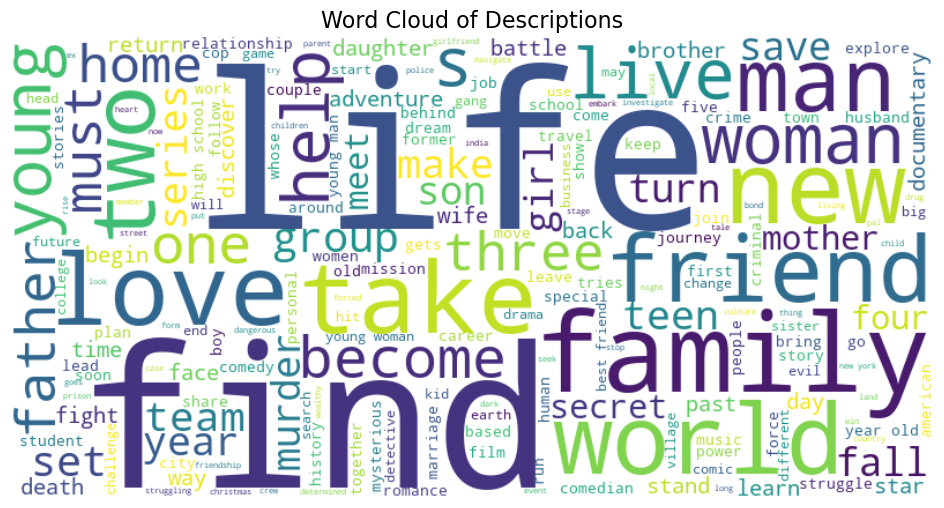

In [52]:
from collections import Counter
all_descriptions = ' '.join(netflix_df['description'].dropna().str.lower())
word_counts = Counter(all_descriptions.split())
common_words = word_counts.most_common(20)
words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_descriptions)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Descriptions', fontsize=16)
plt.show()

#### Inference - Words such as Love, Family, and Life frequently appear in movie and TV show descriptions, reflecting the growing interest in these topics.

# Conclusion 

Based on the exploratory data analysis of the Netflix dataset, it is evident that movies dominate the platform's catalog compared to TV shows. However, adding more TV shows could enhance diversity and cater to a wider audience. Over the years, Netflix has consistently expanded its offerings, with a notable increase in titles added between 2015 and 2020, and 2019 marking the peak year for new content. Monthly trends reveal variations in content addition, with standout months like October 2019 and May 2020 contributing significantly to the platform’s library.

In terms of genres, International Movies and Dramas emerge as the most prevalent, showcasing their global popularity. The average duration for most genres is approximately 110 minutes, while classics typically run slightly longer at around 115 minutes. Themes such as love and family have gained increasing prominence over time, resonating with viewer preferences. This analysis highlights Netflix’s strategic focus on maintaining a fresh and engaging catalog, though opportunities remain to balance the platform’s content with a broader mix of genres and show formats to better meet customer demands.